### Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA_vad
import re
# Download
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Reading the data csvs

In [26]:
df_fake = pd.read_csv('C:/Users/garge/canis_hackathon/archive/DataSet_Misinfo_FAKE.csv')
df_true = pd.read_csv('C:/Users/garge/canis_hackathon/archive/DataSet_Misinfo_TRUE.csv')

In [27]:
df_fake.info(), df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43642 non-null  int64 
 1   text        43642 non-null  object
dtypes: int64(1), object(1)
memory usage: 682.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34975 non-null  int64 
 1   text        34946 non-null  object
dtypes: int64(1), object(1)
memory usage: 546.6+ KB


(None, None)

In [28]:
df_fake.head()

,Unnamed: 0,text
0,0,Donald Trump just couldn t wish all Americans ...
1,1,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk..."
3,3,"On Christmas day, Donald Trump announced that ..."
4,4,Pope Francis used his annual Christmas Day mes...


In [12]:
df_true.head()

,Unnamed: 0,text
0,0,The head of a conservative Republican faction ...
1,1,Transgender people will be allowed for the fir...
2,2,The special counsel investigation of links bet...
3,3,Trump campaign adviser George Papadopoulos tol...
4,4,President Donald Trump called on the U.S. Post...


[Text(0, 44142, '43642'), Text(1, 35475, '34975')]

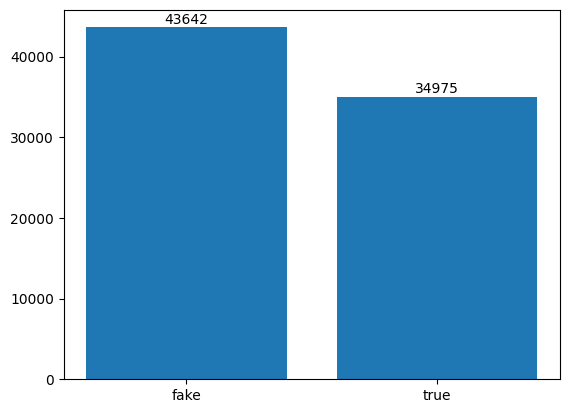

In [29]:
labels=['fake','true']
count=[df_fake.count()[0], df_true.count()[0]]
plt.bar(labels, count)
[plt.text(i, value+500, str(value), ha='center') for i,value in enumerate(count)]

#### Data Cleaning

1. Duplicates

In [30]:
df_fake.value_counts

<bound method DataFrame.value_counts of        Unnamed: 0                                               text
0               0  Donald Trump just couldn t wish all Americans ...
1               1  House Intelligence Committee Chairman Devin Nu...
2               2  On Friday, it was revealed that former Milwauk...
3               3  On Christmas day, Donald Trump announced that ...
4               4  Pope Francis used his annual Christmas Day mes...
...           ...                                                ...
43637       44422  The USA wants to divide Syria.\r\n\r\nGreat Br...
43638       44423  The Ukrainian coup d'etat cost the US nothing ...
43639       44424  The European Parliament falsifies history by d...
43640       44425  The European Parliament falsifies history by d...
43641       44426  A leading FSB officer, Segey Beseda, said duri...

[43642 rows x 2 columns]>

In [31]:
df_true.value_counts

<bound method DataFrame.value_counts of        Unnamed: 0                                               text
0               0  The head of a conservative Republican faction ...
1               1  Transgender people will be allowed for the fir...
2               2  The special counsel investigation of links bet...
3               3  Trump campaign adviser George Papadopoulos tol...
4               4  President Donald Trump called on the U.S. Post...
...           ...                                                ...
34970       34970  Most conservatives who oppose marriage equalit...
34971       34971  The freshman senator from Georgia quoted scrip...
34972       34972  The State Department told the Republican Natio...
34973       34973  ADDIS ABABA, Ethiopia —President Obama convene...
34974       34974  Jeb Bush Is Suddenly Attacking Trump. Here's W...

[34975 rows x 2 columns]>

No duplicates found

2. Missing data

In [32]:
df = df_true[df_true.isnull().any(axis=1)]
len(df)

29

In [33]:
df = df_fake[df_fake.isnull().any(axis=1)]
len(df)

0

In [34]:
df_true=df_true.dropna()
df_fake=df_fake.dropna()

In [35]:
# Adding the Label Column to the data
df_true['label'] = 0
df_true = df_true.drop('Unnamed: 0', axis = 1)

df_fake['label'] = 1
df_fake = df_fake.drop('Unnamed: 0', axis = 1)

# Merging both the dataset
df = pd.concat([df_true, df_fake])

C:\Users\garge\AppData\Local\Temp\ipykernel_18028\719425550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['label'] = 0


3. Data type

In [36]:
df['text'] = df['text'].astype(str)

4. Remove special characters

In [37]:
df['text'] = [re.sub('\t', '',x) for x in df['text']]
df['text'] = [re.sub('\n', '',x) for x in df['text']]
df['text'] = [re.sub('\r', '',x) for x in df['text']]

5. Remove stop words

In [38]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Post Data cleaning count

[Text(0, 44142, '43642'), Text(1, 35446, '34946')]

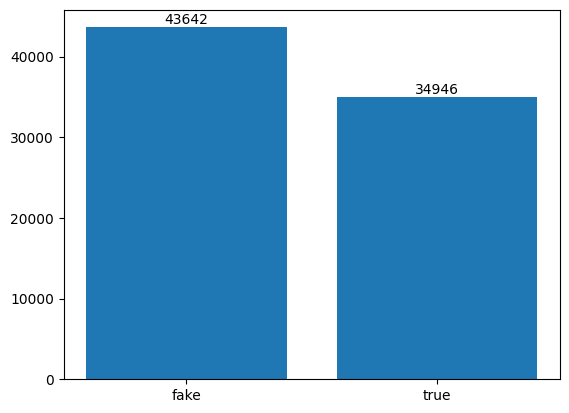

In [39]:
labels=['fake','true']
count=[df_fake.count()[0], df_true.count()[0]]
plt.bar(labels, count)
[plt.text(i, value+500, str(value), ha='center') for i,value in enumerate(count)]

#### Sentimental Analysis of the all the text

In [40]:
sid = SIA_vad()

In [41]:
def vader_compound(text):
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    return compound

In [42]:
df['vader_score'] = df['text'].apply(lambda x : vader_compound(x))

#### Calculating the mean vader score for fake and true news

In [46]:
new_df2 = df[['label', 'vader_score']]
grouped_df2 = new_df2.groupby('label').mean().reset_index()

In [47]:
grouped_df2.head()

,label,vader_score
0,0,0.097805
1,1,-0.078427


In [48]:
df['sentiment'] = np.where(df['vader_score'] > 0,1,0)

Clustering

TF-IDF Vectorization

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

#df = pd.read_csv('data_feature_clean.csv')

text_data = df['text'].values.tolist()
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data) #feature matrix


KMeans clustering

In [50]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

labels = kmeans.labels_
df['cluster'] = labels

C:\Users\garge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
df.to_csv('data_feature.csv')

In [52]:
df_clustered = df.groupby('cluster')

In [53]:
df_clustered.size()


cluster
0    48440
1    15933
2     1252
3     7295
4     5668
dtype: int64

In [54]:
df.groupby(['cluster', 'label']).size().reset_index(name='count')

,cluster,label,count
0,0,0,22982
1,0,1,25458
2,1,0,7372
3,1,1,8561
4,2,0,1117
5,2,1,135
6,3,0,1855
7,3,1,5440
8,4,0,1620
9,4,1,4048


News length

Number of sentences in news

In [64]:
import nltk
nltk.download('punkt')  #tokenizer data

df['no_of_sentences_original_news'] = df['text'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average number of words in each sentence

In [66]:
# Tokenize the text into sentences and words
sentences = [nltk.sent_tokenize(text) for text in df["text"]]
words = [[nltk.word_tokenize(sentence) for sentence in text] for text in sentences]

# Calculate the word count for each sentence
word_count = [[len(sentence) for sentence in text] for text in words]

# Calculate the average word count for each article
avg_word_count = [sum(text)/len(text) for text in word_count]

# Add the average word count as a new column to the DataFrame
df["avg_word_count_sentencewise_original"] = avg_word_count


                                                text  label  \
0  The head of a conservative Republican faction ...      0   
1  Transgender people will be allowed for the fir...      0   
2  The special counsel investigation of links bet...      0   
3  Trump campaign adviser George Papadopoulos tol...      0   
4  President Donald Trump called on the U.S. Post...      0   

                              text_without_stopwords  vader_score  sentiment  \
0  head conservative Republican faction U.S. Cong...       0.9857          1   
1  Transgender people allowed first time enlist U...       0.9488          1   
2  special counsel investigation links Russia Pre...      -0.6808          0   
3  Trump campaign adviser George Papadopoulos tol...      -0.2201          0   
4  President Donald Trump called U.S. Postal Serv...       0.5896          1   

   cluster  original_news_length  nostopwords_news_length  \
0        1                    30                       29   
1        0        

Total word count

In [67]:

# Tokenize the text into words
words = [nltk.word_tokenize(text) for text in df["text"]]

# Calculate the number of words in each text
word_count = [len(text) for text in words]

# Add the word count as a new column to the DataFrame
df["word_count_nostopwords"] = word_count

# Print the DataFrame with the new column
print(df.head())


                                                text  label  \
0  The head of a conservative Republican faction ...      0   
1  Transgender people will be allowed for the fir...      0   
2  The special counsel investigation of links bet...      0   
3  Trump campaign adviser George Papadopoulos tol...      0   
4  President Donald Trump called on the U.S. Post...      0   

                              text_without_stopwords  vader_score  sentiment  \
0  head conservative Republican faction U.S. Cong...       0.9857          1   
1  Transgender people allowed first time enlist U...       0.9488          1   
2  special counsel investigation links Russia Pre...      -0.6808          0   
3  Trump campaign adviser George Papadopoulos tol...      -0.2201          0   
4  President Donald Trump called U.S. Postal Serv...       0.5896          1   

   cluster  original_news_length  nostopwords_news_length  \
0        1                    30                       29   
1        0        

In [72]:
df = df.drop('nostopwords_news_length',axis=1)
df =  df.drop('original_news_length',axis=1)

In [73]:
df

,text,label,text_without_stopwords,vader_score,sentiment,cluster,no_of_sentences_original_news,avg_word_count_sentencewise_original,word_count_nostopwords
0,The head of a conservative Republican faction ...,0,head conservative Republican faction U.S. Cong...,0.9857,1,1,30,29.333333,880
1,Transgender people will be allowed for the fir...,0,Transgender people allowed first time enlist U...,0.9488,1,0,13,34.615385,450
2,The special counsel investigation of links bet...,0,special counsel investigation links Russia Pre...,-0.6808,0,1,17,30.470588,518
3,Trump campaign adviser George Papadopoulos tol...,0,Trump campaign adviser George Papadopoulos tol...,-0.2201,0,1,16,27.000000,432
4,President Donald Trump called on the U.S. Post...,0,President Donald Trump called U.S. Postal Serv...,0.5896,1,0,40,24.550000,982
...,...,...,...,...,...,...,...,...,...
43637,"The USA wants to divide Syria.Great Britain, F...",1,"USA wants divide Syria.Great Britain, France, ...",0.3612,1,3,2,41.000000,82
43638,The Ukrainian coup d'etat cost the US nothing ...,1,Ukrainian coup d'etat cost US nothing nearly n...,-0.6492,0,3,5,23.400000,117
43639,The European Parliament falsifies history by d...,1,European Parliament falsifies history declarin...,-0.9074,0,0,5,27.600000,138
43640,The European Parliament falsifies history by d...,1,European Parliament falsifies history declarin...,-0.9074,0,0,5,27.600000,138


In [75]:
df.to_csv('data_feature.csv',index=False)

PCA